<a href="https://colab.research.google.com/github/smashcoder/DeepLearningSppu/blob/main/CA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
909/909 [==============================] - 5s 3ms/step - loss: 0.3646 - accuracy: 0.8400 - val_loss: 0.3674 - val_accuracy: 0.8361
Epoch 2/50
909/909 [==============================] - 2s 2ms/step - loss: 0.3448 - accuracy: 0.8491 - val_loss: 0.3612 - val_accuracy: 0.8382
Epoch 3/50
909/909 [==============================] - 2s 2ms/step - loss: 0.3407 - accuracy: 0.8496 - val_loss: 0.3613 - val_accuracy: 0.8399
Epoch 4/50
909/909 [==============================] - 2s 2ms/step - loss: 0.3374 - accuracy: 0.8527 - val_loss: 0.3625 - val_accuracy: 0.8428
Epoch 5/50
909/909 [==============================] - 3s 3ms/step - loss: 0.3357 - accuracy: 0.8535 - val_loss: 0.3560 - val_accuracy: 0.8407
Epoch 6/50
909/909 [==============================] - 3s 3ms/step - loss: 0.3333 - accuracy: 0.8546 - val_loss: 0.3613 - val_accuracy: 0.8414
Epoch 7/50
909/909 [==============================] - 2s 2ms/step - loss: 0.3314 - accuracy: 0.8552 - val_loss: 0.3561 - val_accuracy: 0.8411
Epoch 

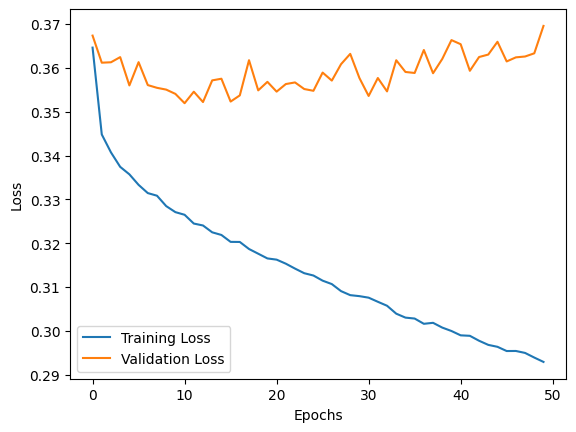

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

# Step 1: Data Preparation
# Load the Australian weather dataset (replace 'weather_data.csv' with your file)
data = pd.read_csv('weather_data.csv')

# Data preprocessing (customize for your dataset)
# Example: Drop columns with missing values and encode categorical variables
data = data.dropna()

# Define your features (X) and target (y)
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
          'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
          'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
y = data['RainTomorrow']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize numerical features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Encode the target variable 'RainTomorrow'
y_train = y_train.map({'No': 0, 'Yes': 1})
y_val = y_val.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

# ...

# Step 2: Define the FFNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# ...

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Step 3: Train the Model
epochs = 50  # Adjust the number of training epochs
batch_size = 32  # Adjust the batch size

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Step 4: Evaluate the Model
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# You can also plot training history to visualize training/validation loss and accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
